In [2]:
import pandas as pd 
import netCDF4 as nc
import numpy as np

In [3]:
FILE_NAME = 'water_vapor_data/surface0.nc'

In [4]:
nc_file = nc.Dataset(FILE_NAME)
print(nc_file.variables.keys())
COL = list(nc_file.variables.keys())[-1]
print(COL)

dict_keys(['lon', 'lat', 'time', 'water_vapor'])
water_vapor


In [5]:
import xarray as xr
file_lst = []
lat_lst = []
lon_lst = []
label_lst = ["May 2013", "June 2013", "July 2013"]
for i in range(len(label_lst)):
    FIL_FOL = 'water_vapor_data/surface'
    lat_lst.append(nc.Dataset(f'{FIL_FOL}{i}.nc').variables['lat'][:])
    lon_lst.append(nc.Dataset(f'{FIL_FOL}{i}.nc').variables['lon'][:])
    file_lst.append(xr.open_dataset(f'{FIL_FOL}{i}.nc', decode_times=False).to_dataframe())

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import io
import plotly
import cartopy.crs as ccrs
import imageio
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LongitudeFormatter, LatitudeFormatter

def make_contour(file_csv, latitude, longitude, title):
    X, Y = np.meshgrid(latitude, longitude)
    if (file_csv[COL].shape[0] == 2073600):
        file_csv = file_csv.reset_index([0, 1, 2, 3])
        file_csv = file_csv[file_csv['bnds'] == 0]
    srs = file_csv[COL].to_numpy().reshape(-1,720)
    map_cord = pd.DataFrame(columns=latitude, index=longitude, data=srs)


    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())


    # add the coastlines to the plot
    ax.add_feature(cfeature.COASTLINE, linewidth=0.5)

    # shift the values from longitude 180 to the start of the plot
    shifted_map_cord = np.roll(map_cord, 720, axis=1)

    LEVELS = 20

    # make contour plot
    plt.contour(Y, X, shifted_map_cord, colors='k', linewidths=0.2, levels=LEVELS)
    im = plt.contourf(Y, X, shifted_map_cord, cmap='viridis', levels=LEVELS,linewidths=0.5)



    # add colorbar and show plot
    plt.colorbar(im,fraction=0.025, pad=0.04)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    ax.set_title(f"{COL.capitalize()} {title}")

    ax.set_xticks(np.arange(-180, 181, 30), crs=ccrs.PlateCarree())
    ax.set_yticks(np.arange(-90, 91, 30), crs=ccrs.PlateCarree())
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
    
    plt.show()

    buf = io.BytesIO()
    fig.canvas.print_png(buf)
    buf.seek(0)
    image_lst.append(imageio.imread(buf))


C:\Users\patel\AppData\Roaming\Python\Python311\site-packages\cartopy\mpl\geoaxes.py:1655: UserWarning: linewidths is ignored by contourf
  result = super().contourf(*args, **kwargs)


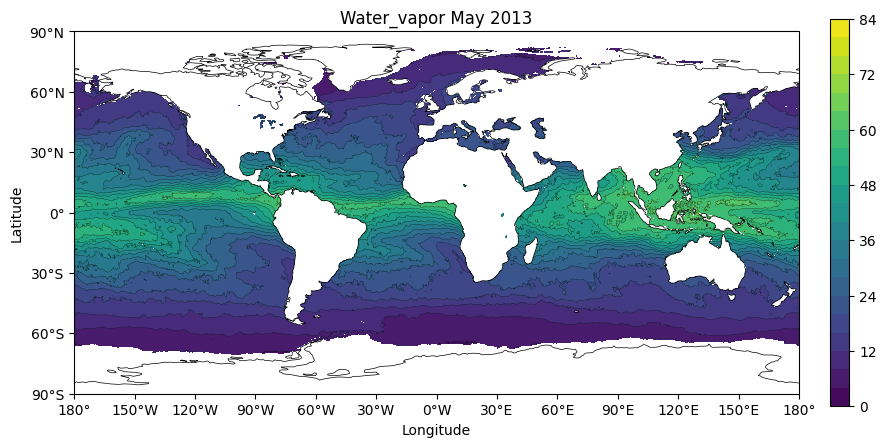

C:\Users\patel\AppData\Local\Temp\ipykernel_4100\2094700288.py:55: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image_lst.append(imageio.imread(buf))
C:\Users\patel\AppData\Roaming\Python\Python311\site-packages\cartopy\mpl\geoaxes.py:1655: UserWarning: linewidths is ignored by contourf
  result = super().contourf(*args, **kwargs)


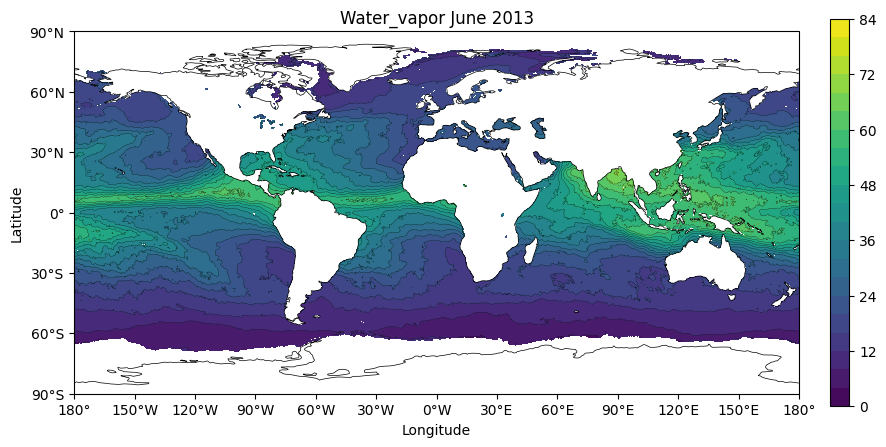

C:\Users\patel\AppData\Local\Temp\ipykernel_4100\2094700288.py:55: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image_lst.append(imageio.imread(buf))
C:\Users\patel\AppData\Roaming\Python\Python311\site-packages\cartopy\mpl\geoaxes.py:1655: UserWarning: linewidths is ignored by contourf
  result = super().contourf(*args, **kwargs)


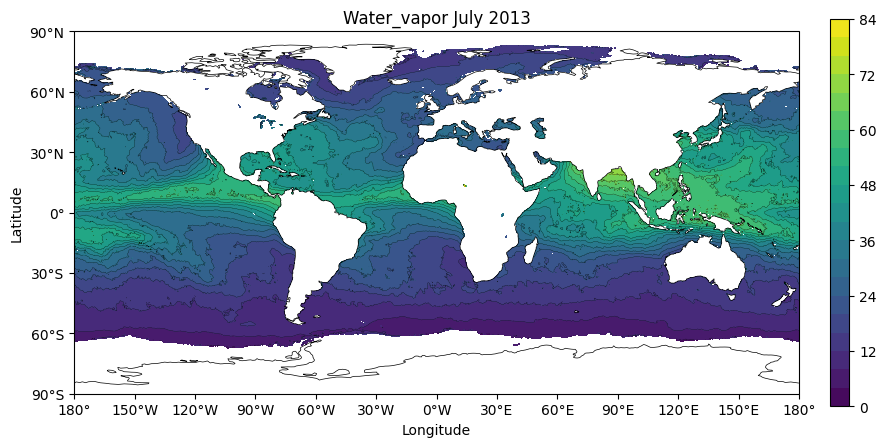

C:\Users\patel\AppData\Local\Temp\ipykernel_4100\2094700288.py:55: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image_lst.append(imageio.imread(buf))


In [7]:
image_lst = []

for i in range(len(file_lst)):
    make_contour(file_lst[i], latitude=lat_lst[i], longitude=lon_lst[i], title=label_lst[i])

In [8]:
def save_images(image_lst, file_name):
    for i in range(len(image_lst)):
        imageio.imwrite(f'{file_name}{i}.png', image_lst[i])

In [9]:
save_images(image_lst, 'generated_images/water_vapor_fill_viridis/')

In [35]:
# Create gif image
imageio.mimsave('generated_gifs/waterVapourContour20.gif', image_lst, fps=1, loop=True)

In [14]:
# Create mp4 video

import imageio

filenames = ['frame_{}.png'.format(i) for i in range(len(image_lst))]

images = []
for filename in filenames:
    img = imageio.imread(filename)
    img = img[:, :, :3] 
    images.append(img)

imageio.mimsave('animation.mp4', images, fps=1, codec='mpeg4')

C:\Users\patel\AppData\Local\Temp\ipykernel_18964\421607028.py:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(filename)
bitrate tolerance 128000 too small for bitrate 1024000, overriding
